**Learning about lasso and elastic net**

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression,load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

In [10]:
X,y=make_regression(n_features=1,n_targets=1,n_samples=200,noise=10,random_state=12)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [23]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.coef_

array([3.30144161])

[2.38103455]

[1.4606275]

[0.]

[0.]

[0.]



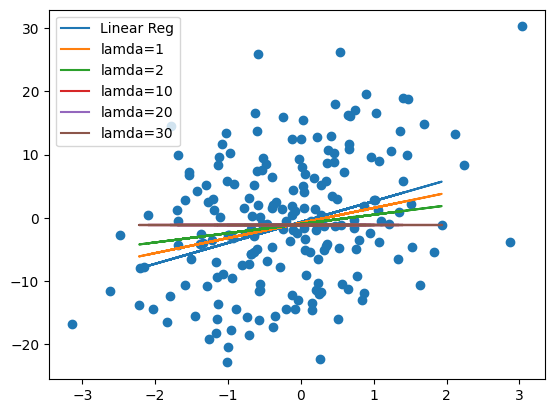

In [22]:
plt.scatter(X,y)
plt.plot(X_test,lr.predict(X_test),label="Linear Reg")
for i in [1,2,10,20,30]:
    lasso=Lasso(alpha=i)
    lasso.fit(X_train,y_train)
    plt.plot(X_test,lasso.predict(X_test),label="lamda={}".format(i))
    print(lasso.coef_)
    print()

plt.legend()
plt.show()

In [30]:
df=load_diabetes()
X=df.data
y=df.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44)

In [31]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(f"R2 Score {r2_score(y_test,y_pred)}")
print(f"MSE Score {mean_squared_error(y_test,y_pred)}")

R2 Score 0.5252024842346733
MSE Score 2588.020136935837


In [68]:
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
y_pred1=lasso.predict(X_test)
print(f"R2 Score {r2_score(y_test,y_pred1)}")
print(f"MSE Score {mean_squared_error(y_test,y_pred1)}")

R2 Score 0.5019753487835406
MSE Score 2753.921832937356


In [36]:
lasso.coef_

array([ -37.90521663, -208.8943484 ,  523.66385397,  312.79315165,
       -639.38629718,  314.45449729,   91.55574802,  242.2817185 ,
        675.38643312,   87.7230419 ])

In [43]:
l2=Lasso(max_iter=10000)

In [52]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.1,0.01,0.001,0.5]}
grid = GridSearchCV(l2, params, cv=5, scoring='r2')
grid.fit(X, y)

print("Best R² Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best R² Score: 0.4823055427139803
Best Params: {'alpha': 0.001}


In [74]:
el=ElasticNet()
parameters={
    'alpha':[0.1,0.01,0.001,0.0001],
    'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}
grid1=GridSearchCV(el,parameters,cv=3,scoring='r2')
grid1.fit(X_train,y_train)
# y_pred2=el.predict(X_test)

print("Best R² Score:", grid1.best_score_)
print("Best Params:", grid1.best_params_)

Best R² Score: 0.4701592798686954
Best Params: {'alpha': 0.001, 'l1_ratio': 0.7}
